# Packages

In [1]:
# using Pkg
using Plots
using Random
using Dates
using DataFrames
using Statistics
using AlphaVantage
using Distributions
using HypothesisTests
using FractionalCalculus
using Downloads
using CSV
using MarketData
using Pandas
using SciPy
sch = SciPy.cluster.hierarchy

PyObject <module 'scipy.cluster.hierarchy' from 'C:\\Users\\hamid\\.julia\\conda\\3\\lib\\site-packages\\scipy\\cluster\\hierarchy.py'>

# Include jl file

In [8]:
#utilities
include("RandomData.jl")
include("percentageChange.jl")

include("HRP.jl")

hrpMC

# Data

In [5]:
stocks = [:AAPL, :MSFT, :GOOG, :AMZN, :TSLA, :NFLX, :WMT, :F, :AAL, :META]
start = DateTime(2020, 1, 1)
allStocks = []
for symb in stocks
    data = DataFrames.DataFrame(yahoo(symb, YahooOpt(period1 = start)))
    priceAdjClose = data.AdjClose
    if getindex(stocks, 1) == symb
        timeStamp = data.timestamp
        allStocks = hcat(timeStamp, priceAdjClose)
    else
        allStocks = hcat(allStocks, priceAdjClose)
    end
end
allStocksPrices = DataFrames.DataFrame(allStocks, :auto)
allStocksPrices = DataFrames.rename(allStocksPrices, names(allStocksPrices) .=> String.(append!([:Dates], stocks)))
CSV.write("Data_Prices.csv", allStocksPrices)

,Dates,AAPL,MSFT,GOOG,AMZN,TSLA,NFLX,WMT,F
,Any,Any,Any,Any,Any,Any,Any,Any,Any
1,2020-01-02,73.5615,156.152,68.3685,94.9005,28.684,329.81,113.801,8.92509
2,2020-01-03,72.8464,154.208,68.033,93.7485,29.534,325.9,112.796,8.72612
3,2020-01-06,73.4268,154.606,69.7105,95.144,30.1027,335.83,112.567,8.67875
4,2020-01-07,73.0815,153.197,69.667,95.343,31.2707,330.75,111.524,8.76402
5,2020-01-08,74.2571,155.637,70.216,94.5985,32.8093,339.26,111.141,8.76402
6,2020-01-09,75.8344,157.581,70.9915,95.0525,32.0893,335.66,112.289,8.7735
7,2020-01-10,76.0058,156.852,71.4865,94.158,31.8767,329.05,111.352,8.76402
8,2020-01-13,77.6296,158.738,71.9615,94.565,34.9907,338.92,110.873,8.75455
9,2020-01-14,76.5814,157.62,71.544,93.472,35.8613,338.69,111.16,8.80192


In [6]:
first(allStocksPrices, 10)

,Dates,AAPL,MSFT,GOOG,AMZN,TSLA,NFLX,WMT,F
,Any,Any,Any,Any,Any,Any,Any,Any,Any
1,2020-01-02,73.5615,156.152,68.3685,94.9005,28.684,329.81,113.801,8.92509
2,2020-01-03,72.8464,154.208,68.033,93.7485,29.534,325.9,112.796,8.72612
3,2020-01-06,73.4268,154.606,69.7105,95.144,30.1027,335.83,112.567,8.67875
4,2020-01-07,73.0815,153.197,69.667,95.343,31.2707,330.75,111.524,8.76402
5,2020-01-08,74.2571,155.637,70.216,94.5985,32.8093,339.26,111.141,8.76402
6,2020-01-09,75.8344,157.581,70.9915,95.0525,32.0893,335.66,112.289,8.7735
7,2020-01-10,76.0058,156.852,71.4865,94.158,31.8767,329.05,111.352,8.76402
8,2020-01-13,77.6296,158.738,71.9615,94.565,34.9907,338.92,110.873,8.75455
9,2020-01-14,76.5814,157.62,71.544,93.472,35.8613,338.69,111.16,8.80192


In [10]:
allStocksReturns = pctChange(allStocksPrices)[1:end, :]
CSV.write("Data_Returns.csv", allStocksReturns)
allStocksReturns[1:10, :]

,AAPL,MSFT,GOOG,AMZN,TSLA,NFLX
,Float64,Float64,Float64,Float64,Float64,Float64
1,NaN,NaN,NaN,NaN,NaN,NaN
2,-0.00972229,-0.0124518,-0.00490727,-0.012139,0.0296332,-0.0118553
3,0.00796837,0.00258476,0.0246572,0.0148856,0.0192547,0.0304694
4,-0.00470293,-0.0091177,-0.000624052,0.00209162,0.0388005,-0.0151267
5,0.0160862,0.0159285,0.00788039,-0.00780864,0.0492048,0.0257294
6,0.0212409,0.0124929,0.0110445,0.00479918,-0.021945,-0.0106113
7,0.00226052,-0.00462709,0.00697271,-0.0094106,-0.00662731,-0.0196926
8,0.0213645,0.0120243,0.00664458,0.00432257,0.0976889,0.0299955
9,-0.0135034,-0.00704304,-0.00580175,-0.0115582,0.0248828,-0.000678659


# Snippet 16.1, 16.2

In [11]:
covariance = cov(Matrix(allStocksReturns[2:end, :]))
correlation = cor(Matrix(allStocksReturns[2:end, :]));

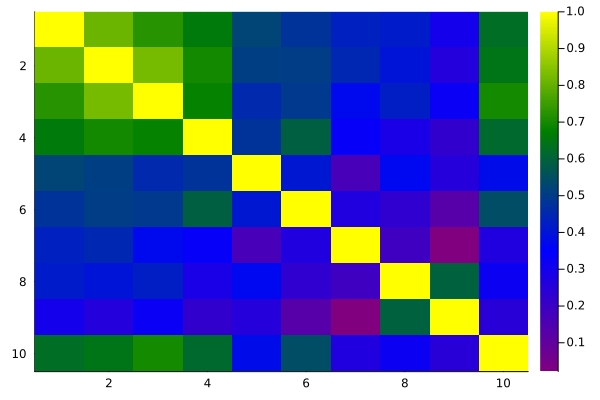

In [12]:
heatmap(correlation, c = cgrad([:purple, :blue, :green, :yellow]), yflip = true)

In [13]:
distance = distanceCorr(correlation)
link = sch.linkage(distance, "single")

C:\Users\hamid\.julia\conda\3\lib\site-packages\scipy\cluster\hierarchy.py:1572: ComplexWarning: Casting complex values to real discards the imaginary part
  X = X.astype(np.double)


9×4 Matrix{Float64}:
  0.0   2.0  3.8008e-5    2.0
  6.0   8.0  0.00320904   2.0
  4.0   5.0  0.00821697   2.0
  1.0  10.0  0.0123677    3.0
  7.0  12.0  0.0205258    3.0
  3.0   9.0  0.0282       2.0
 13.0  15.0  0.0556685    5.0
 14.0  16.0  0.0808649    8.0
 11.0  17.0  0.104548    10.0

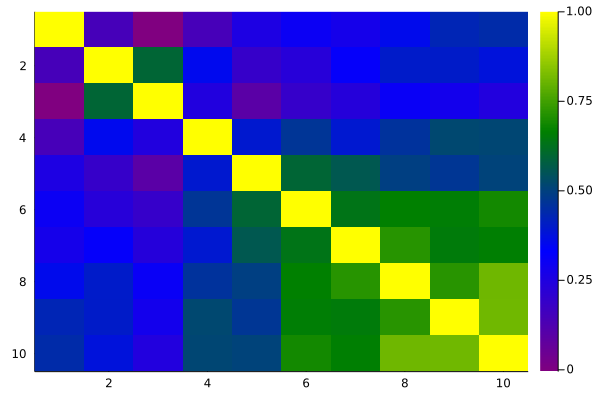

In [13]:
sortIx = quasiDiagonal(link)
correlationSorted = correlation[sortIx .+ 1, sortIx .+ 1]
heatmap(correlationSorted, c = cgrad([:purple, :blue, :green, :yellow]), yflip = true)

# Snippet 16.3

In [14]:
hrp = recursiveBisection(covariance, sortIx)
hrp.name = vec(stocks[transpose(hrp.index.+1)])
hrp

,index,weight,name
,Int64,Float64,Symbol
1,6,0.380423,WMT
2,7,0.0997967,F
3,8,0.0401472,AAL
4,4,0.0324827,TSLA
5,5,0.068875,NFLX
6,3,0.0979995,AMZN
7,9,0.0655324,META
8,2,0.110017,GOOG
9,0,0.0486189,AAPL


# Sum

In [15]:
hrp = HRP(covariance, correlation)
DataFrames.DataFrame(weight = hrp, stocks = stocks)

,weight,stocks
,Float64,Symbol
1,0.0486189,AAPL
2,0.0561082,MSFT
3,0.110017,GOOG
4,0.0979995,AMZN
5,0.0324827,TSLA
6,0.068875,NFLX
7,0.380423,WMT
8,0.0997967,F
9,0.0401472,AAL


# Next part

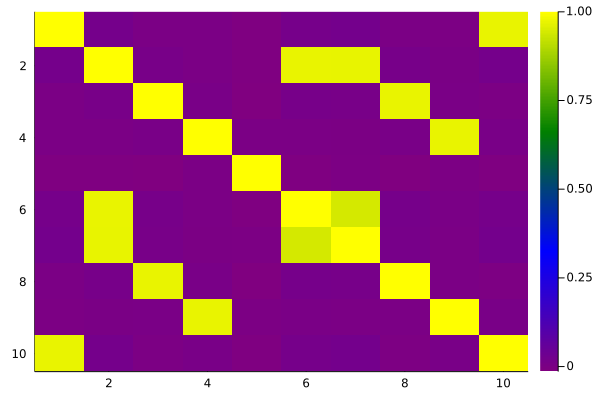

In [20]:
#1) Generate correlated data
nObservations, size0, size1, sigma1 = 10000, 5, 5, .25
data, cols = randomData(nObservations, size0, size1, sigma1)
##cov and corr
cov_ = cov(Matrix(data))
corr_ = cor(Matrix(data))
#2) compute and plot correl matrix
heatmap(corr_, c = cgrad([:purple, :blue, :green, :yellow]), yflip = true)

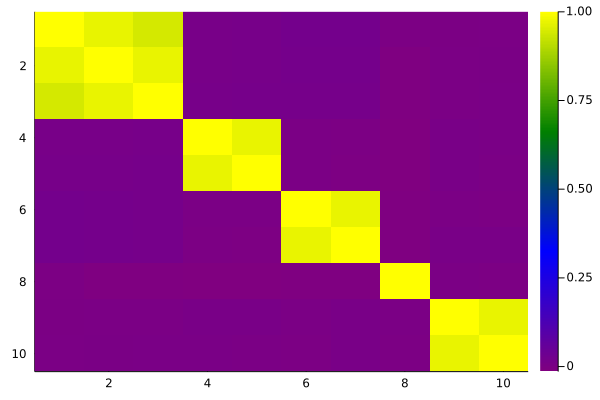

In [23]:
#3) cluster
distance = distanceCorr(corr_)
link = sch.linkage(distance, "single")
sortIx = quasiDiagonal(link)
corrSorted = corr_[sortIx .+ 1, sortIx .+ 1]
heatmap(corrSorted, c = cgrad([:purple, :blue, :green, :yellow]), yflip = true)

In [24]:
#4) Capital allocation
hrp = recursiveBisection(cov_, sortIx)
hrp[:, [end - 1, end]]

,index,weight
,Int64,Float64
1,6,0.0709545
2,1,0.0753235
3,5,0.123922
4,2,0.0676393
5,7,0.0641612
6,0,0.107569
7,9,0.100854
8,4,0.197154
9,3,0.0991717


# Monte Carlo simulation

In [25]:
@profile hrpMC()